#import libiares

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=7f730ea7abd68d844bcab1e89fd684a00731f6709bd31d3c3cc41a01a488d7a1
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy
import wget
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from drive.MyDrive.graduation_project.utils.utils import *
from drive.MyDrive.graduation_project.utils.features_preprocessing import *

In [ ]:
np.random.seed = 100

#download the data

In [ ]:
url_tab_train = 'https://storage.googleapis.com/kagglesdsdata/competitions/20604/1357052/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1617227110&Signature=C5r5j%2Bf3HL4lq4cJN6swnEC%2FGMpan9jn98vfMBmRa6hZsWWAI3uyQ5rVI98b7OPxqCSjijPx9veYrHyu5RE%2B0Q0DT4esTIbs3K1wncO4g0uH%2F%2Fevme0YVjYtEYNuK5MHc1Cmd6IjPzX%2BTDtYMNwHn9TlwnCkBeljkd6F51DXlPncqNrufHRa07b6it%2FxKLahk2xVBvNEeZABy7CIAgEBRuVVJwrdL5IDMmrUzGJIUCVcSr2ItrHCrl%2B9F1sPycdjEFo43PGACQzw%2FoiAI3gNdPmHwO5pN%2F3kzgHS3RRUIriL6CCCBJX47KY0C8wr9LPoBdM%2B8ws1uXjcvgkVgkoUKA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv'
url_tab_test = 'https://storage.googleapis.com/kagglesdsdata/competitions/20604/1357052/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1611675231&Signature=FN8fD%2B4XQn6kY762NgMQH55dc%2B%2B1NhEjwwVYqJ2s5bNsjjRvO72Y9ISovX4d3mlG4xMUHJuDtjVbXMqvDJYRS3IimajnBHGZAbLU1YZl6ohP0VJ51XB2TTXZ%2BfWIwOJMCylA6DFYH%2B90HB5zoMSIyfpUyoSgC96%2FpXf1fOlE58E%2FPxtHtQEQbciPnpMXNhj%2FXI2MRFMoGUycjJmd4YR%2BEL2JdlyYhMrnX%2FM5z2%2B5hUJQquV3NuE9PkCn2Nq%2F0Ixnyz7%2F%2BaygNdM28FVI0N3zWnXyG4jgWQPQb4JUba8LFGX6sKpSQAJCetZNoOaBHmbAhsCX%2FsMiUrMWEHX5zlqWoQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv'

In [ ]:
wget.download(url_tab_train, '/content/train.csv')
wget.download(url_tab_test, '/content/test.csv')

'/content/train.csv'

In [ ]:
train_data = pd.read_csv('train.csv')
#test_data = pd.read_csv('test.csv')

#exploratory data analysis

In [ ]:
print("Training Dataframe shape" , train_data.shape)
train_data.head()

Training Dataframe shape (1549, 7)


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [ ]:
print("Test Dataframe shape" , test_data.shape)
test_data.head()

Test Dataframe shape (5, 7)


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [ ]:
train_data.nunique()

Patient           176
Weeks             112
FVC              1202
Percent          1536
Age                34
Sex                 2
SmokingStatus       3
dtype: int64

In [ ]:
train_data.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [ ]:
grouped = train_data.groupby('Patient')[['Weeks','FVC','Percent']].agg([np.min,np.max,np.mean,np.std]).astype(int)

In [ ]:
grouped.head()

Weeks                 FVC  ...      Percent              
                           amin amax mean std  amin  ...  std    amin amax mean std
Patient                                              ...                           
ID00007637202177411956430    -4   57   19  19  2000  ...   96      50   58   53   2
ID00009637202177434476278     8   60   24  18  3214  ...  197      74   90   83   4
ID00010637202177584971671     0   54   16  18  2474  ...  358      66   94   81   9
ID00011637202177653955184     6   58   22  18  3193  ...  113      82   91   87   2
ID00012637202177665765362    33   87   49  18  2971  ...  212      81  103   91   5

[5 rows x 12 columns]

In [ ]:
patient_data = train_data.drop_duplicates('Patient')[['Patient','Age','Sex','SmokingStatus']]

In [ ]:
patient_data.head()

,Patient,Age,Sex,SmokingStatus
0,ID00007637202177411956430,79,Male,Ex-smoker
9,ID00009637202177434476278,69,Male,Ex-smoker
18,ID00010637202177584971671,60,Male,Ex-smoker
27,ID00011637202177653955184,72,Male,Ex-smoker
36,ID00012637202177665765362,65,Male,Never smoked


In [ ]:
patient_data = patient_data.join(grouped,on='Patient')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
patient_data.head()

,Patient,Age,Sex,SmokingStatus,"(Weeks, amin)","(Weeks, amax)","(Weeks, mean)","(Weeks, std)","(FVC, amin)","(FVC, amax)","(FVC, mean)","(FVC, std)","(Percent, amin)","(Percent, amax)","(Percent, mean)","(Percent, std)"
0,ID00007637202177411956430,79,Male,Ex-smoker,-4,57,19,19,2000,2315,2113,96,50,58,53,2
9,ID00009637202177434476278,69,Male,Ex-smoker,8,60,24,18,3214,3895,3596,197,74,90,83,4
18,ID00010637202177584971671,60,Male,Ex-smoker,0,54,16,18,2474,3523,3037,358,66,94,81,9
27,ID00011637202177653955184,72,Male,Ex-smoker,6,58,22,18,3193,3541,3387,113,82,91,87,2
36,ID00012637202177665765362,65,Male,Never smoked,33,87,49,18,2971,3759,3348,212,81,103,91,5


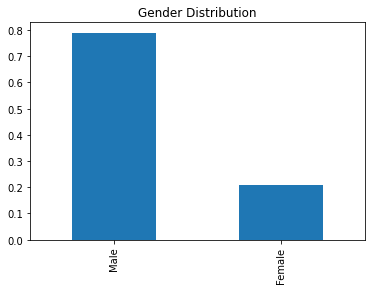

In [ ]:
patient_data['Sex'].value_counts(normalize = True).plot(kind = 'bar',title = 'Gender Distribution')

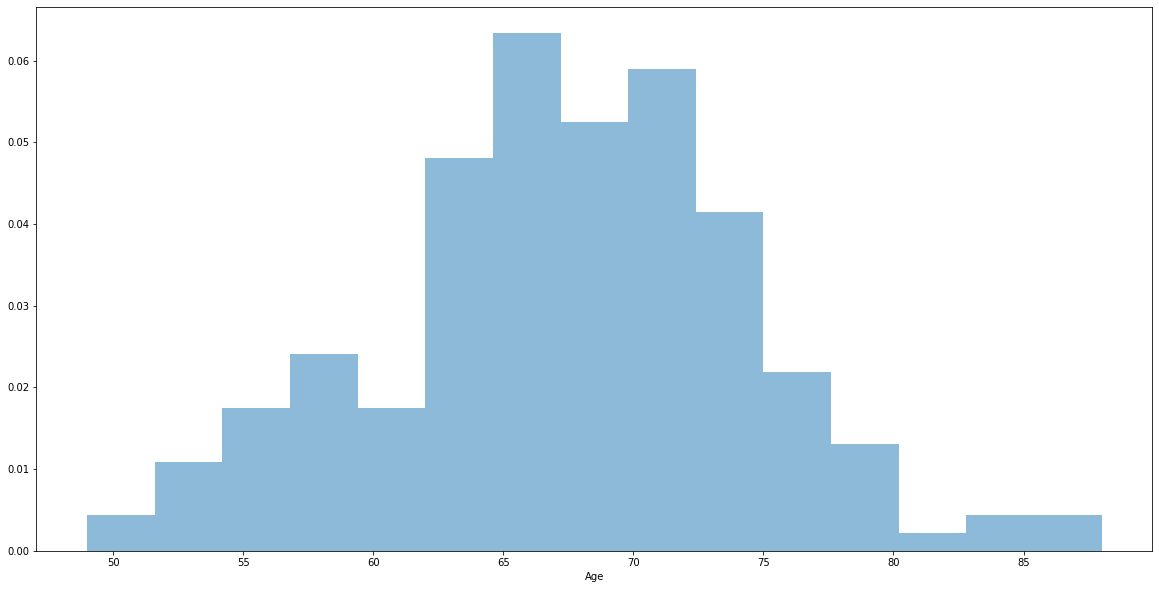

In [ ]:
data = patient_data.Age.tolist()
hist(data,15,'Age')

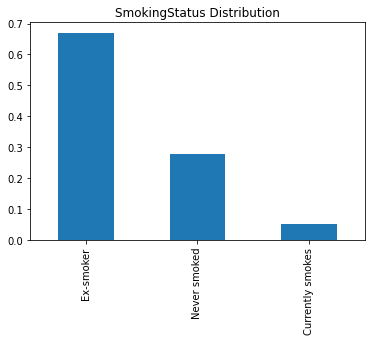

In [ ]:
patient_data['SmokingStatus'].value_counts(normalize = True).plot(kind = 'bar',title = 'SmokingStatus Distribution')

In [ ]:
patient_data.corr()

,Age,"(Weeks, amin)","(Weeks, amax)","(Weeks, mean)","(Weeks, std)","(FVC, amin)","(FVC, amax)","(FVC, mean)","(FVC, std)","(Percent, amin)","(Percent, amax)","(Percent, mean)","(Percent, std)"
Age,1.000000,-0.062681,-0.110575,-0.089393,-0.152816,-0.060304,-0.096552,-0.094155,-0.120353,0.130581,0.118747,0.104434,-0.017360
"(Weeks, amin)",-0.062681,1.000000,0.889553,0.976865,0.032169,-0.034638,-0.023629,-0.014274,0.028718,0.036571,0.069021,0.074094,0.075038
"(Weeks, amax)",-0.110575,0.889553,1.000000,0.957101,0.467163,0.078586,0.087884,0.095761,0.028908,0.113692,0.141089,0.146583,0.059168
"(Weeks, mean)",-0.089393,0.976865,0.957101,1.000000,0.211708,0.020049,0.030640,0.040277,0.033106,0.070019,0.099348,0.106285,0.068645
"(Weeks, std)",-0.152816,0.032169,0.467163,0.211708,1.000000,0.235340,0.231065,0.232283,-0.004267,0.161929,0.158447,0.160441,-0.022591
"(FVC, amin)",-0.060304,-0.034638,0.078586,0.020049,0.235340,1.000000,0.945436,0.971286,-0.007867,0.706808,0.590076,0.644450,-0.234662
"(FVC, amax)",-0.096552,-0.023629,0.087884,0.030640,0.231065,0.945436,1.000000,0.989548,0.310188,0.615036,0.624852,0.635351,0.063001
"(FVC, mean)",-0.094155,-0.014274,0.095761,0.040277,0.232283,0.971286,0.989548,1.000000,0.203599,0.655605,0.622241,0.658782,-0.038596
"(FVC, std)",-0.120353,0.028718,0.028908,0.033106,-0.004267,-0.007867,0.310188,0.203599,1.000000,-0.168898,0.190397,0.066219,0.897371
"(Percent, amin)",0.130581,0.036571,0.113692,0.070019,0.161929,0.706808,0.615036,0.655605,-0.168898,1.000000,0.916996,0.958926,-0.115781


In [ ]:
patient_data['decade'] = patient_data['Age'] // 10

In [ ]:
patient_data.head()

,Patient,Age,Sex,SmokingStatus,"(Weeks, amin)","(Weeks, amax)","(Weeks, mean)","(Weeks, std)","(FVC, amin)","(FVC, amax)","(FVC, mean)","(FVC, std)","(Percent, amin)","(Percent, amax)","(Percent, mean)","(Percent, std)",decade
0,ID00007637202177411956430,79,Male,Ex-smoker,-4,57,19,19,2000,2315,2113,96,50,58,53,2,7
9,ID00009637202177434476278,69,Male,Ex-smoker,8,60,24,18,3214,3895,3596,197,74,90,83,4,6
18,ID00010637202177584971671,60,Male,Ex-smoker,0,54,16,18,2474,3523,3037,358,66,94,81,9,6
27,ID00011637202177653955184,72,Male,Ex-smoker,6,58,22,18,3193,3541,3387,113,82,91,87,2,7
36,ID00012637202177665765362,65,Male,Never smoked,33,87,49,18,2971,3759,3348,212,81,103,91,5,6


In [ ]:
patient_data.corr()

,Age,"(Weeks, amin)","(Weeks, amax)","(Weeks, mean)","(Weeks, std)","(FVC, amin)","(FVC, amax)","(FVC, mean)","(FVC, std)","(Percent, amin)","(Percent, amax)","(Percent, mean)","(Percent, std)",decade
Age,1.000000,-0.062681,-0.110575,-0.089393,-0.152816,-0.060304,-0.096552,-0.094155,-0.120353,0.130581,0.118747,0.104434,-0.017360,0.929387
"(Weeks, amin)",-0.062681,1.000000,0.889553,0.976865,0.032169,-0.034638,-0.023629,-0.014274,0.028718,0.036571,0.069021,0.074094,0.075038,-0.074469
"(Weeks, amax)",-0.110575,0.889553,1.000000,0.957101,0.467163,0.078586,0.087884,0.095761,0.028908,0.113692,0.141089,0.146583,0.059168,-0.121218
"(Weeks, mean)",-0.089393,0.976865,0.957101,1.000000,0.211708,0.020049,0.030640,0.040277,0.033106,0.070019,0.099348,0.106285,0.068645,-0.108210
"(Weeks, std)",-0.152816,0.032169,0.467163,0.211708,1.000000,0.235340,0.231065,0.232283,-0.004267,0.161929,0.158447,0.160441,-0.022591,-0.149741
"(FVC, amin)",-0.060304,-0.034638,0.078586,0.020049,0.235340,1.000000,0.945436,0.971286,-0.007867,0.706808,0.590076,0.644450,-0.234662,-0.066280
"(FVC, amax)",-0.096552,-0.023629,0.087884,0.030640,0.231065,0.945436,1.000000,0.989548,0.310188,0.615036,0.624852,0.635351,0.063001,-0.102565
"(FVC, mean)",-0.094155,-0.014274,0.095761,0.040277,0.232283,0.971286,0.989548,1.000000,0.203599,0.655605,0.622241,0.658782,-0.038596,-0.100666
"(FVC, std)",-0.120353,0.028718,0.028908,0.033106,-0.004267,-0.007867,0.310188,0.203599,1.000000,-0.168898,0.190397,0.066219,0.897371,-0.118063
"(Percent, amin)",0.130581,0.036571,0.113692,0.070019,0.161929,0.706808,0.615036,0.655605,-0.168898,1.000000,0.916996,0.958926,-0.115781,0.094145


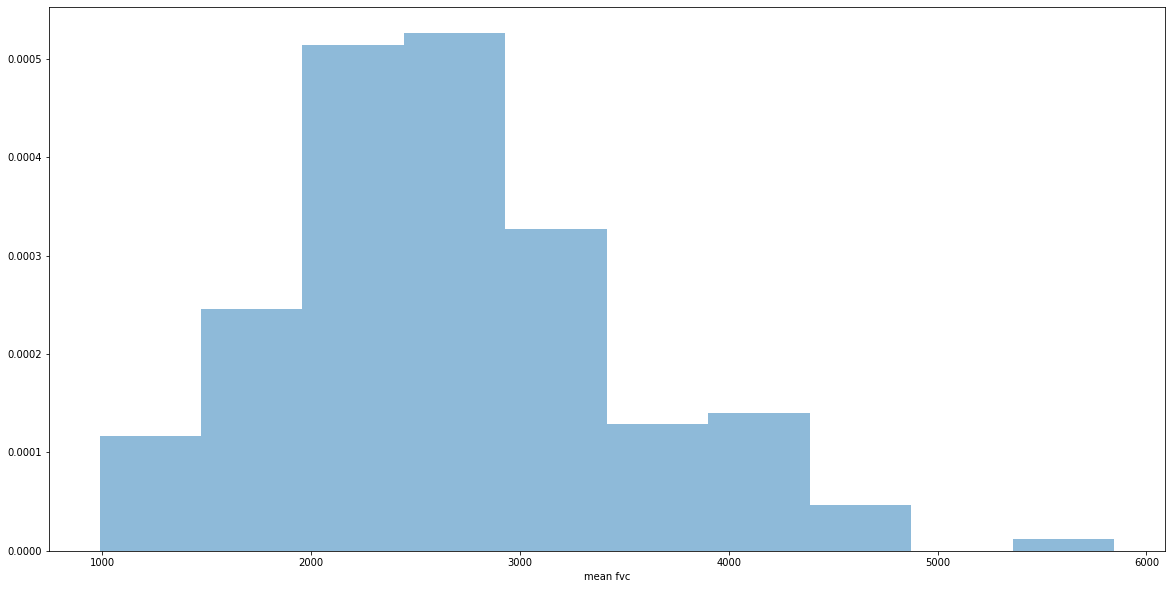

In [ ]:
hist(patient_data[('FVC','mean')],10,'mean fvc')

In [ ]:
len(patient_data[patient_data[('FVC','amin') ] > 4000])

5

In [ ]:
patient_data[patient_data[('FVC','amin') ] > 4000]

,Patient,Age,Sex,SmokingStatus,"(Weeks, amin)","(Weeks, amax)","(Weeks, mean)","(Weeks, std)","(FVC, amin)","(FVC, amax)","(FVC, mean)","(FVC, std)","(Percent, amin)","(Percent, amax)","(Percent, mean)","(Percent, std)",decade
332,ID00094637202205333947361,64,Male,Ex-smoker,0,58,20,19,4574,4916,4759,96,109,117,113,2,6
570,ID00138637202231603868088,66,Male,Ex-smoker,14,70,32,18,4151,4510,4310,113,100,108,104,2,6
714,ID00190637202244450116191,69,Male,Ex-smoker,4,62,24,19,4169,4490,4350,122,108,117,113,3,6
822,ID00219637202258203123958,71,Male,Ex-smoker,0,56,19,18,5613,6399,5845,228,134,153,139,5,7
1362,ID00376637202297677828573,72,Male,Never smoked,39,93,56,18,4125,4386,4260,87,115,122,119,2,7


In [ ]:
bad_patients_id = patient_data[patient_data[('FVC','amin') ] > 4000]['Patient']

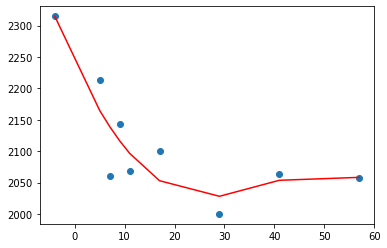

array([-1.70421296e+01,  3.51269616e-01,  7.79248217e-04, -4.70952748e-05,
        2.24120268e+03])

In [ ]:
fitted_curve(get_patients(train_data)[0],4,True)

###missing weeks



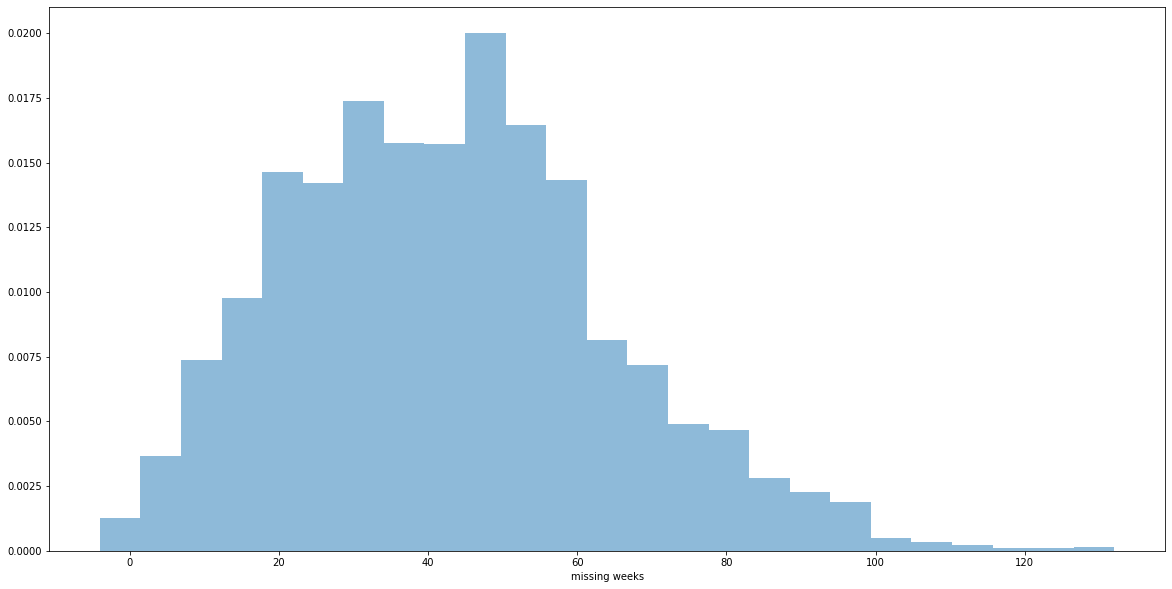

In [ ]:
hist(get_missing(train_data),25,'missing weeks')

9     132
8      25
10     10
7       7
6       2
dtype: int64


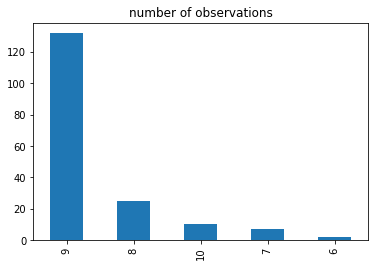

In [ ]:
l = list()
for patient in get_patients(train_data):
  l.append(len(patient['Weeks']))
print(pd.value_counts(l))
pd.value_counts(l).plot(kind = 'bar',title='number of observations')

##feature pre-processing and generation

Numeric feature :  


1. remove outliers
2. appending missing weeks
3. handling missing FVC 


Categorical feature :
 
1. convert SmokingStatus into a one-hot vector

In [ ]:
pipeline = Pipeline([('RemoveOutliers',RemoveOutliers(bad_patients_id)),
                     ('AppendMissingWeeks',AppendMissingWeeks()),
                     ('HandlingMissingFVC ', HandlingMissingData()),
                        ('CategoricalTransformer',CategoricalTransformer())
                         ])

In [ ]:
train = pipeline.fit_transform(train_data)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


171


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
train.head(10)

,Patient,Weeks,FVC,Percent,Sex,Ex-smoker,Never-smoked,Currently-smokes,decade
0,ID00007637202177411956430,-4,2315,58.253649,0,1,0,0,7
1,ID00007637202177411956430,1,2251,58.253649,0,1,0,0,7
2,ID00007637202177411956430,5,2214,58.253649,0,1,0,0,7
3,ID00007637202177411956430,7,2061,58.253649,0,1,0,0,7
4,ID00007637202177411956430,9,2144,58.253649,0,1,0,0,7
5,ID00007637202177411956430,11,2069,58.253649,0,1,0,0,7
6,ID00007637202177411956430,17,2101,58.253649,0,1,0,0,7
7,ID00007637202177411956430,29,2000,58.253649,0,1,0,0,7
8,ID00007637202177411956430,41,2064,58.253649,0,1,0,0,7
9,ID00007637202177411956430,57,2057,58.253649,0,1,0,0,7


In [ ]:
train.to_csv('/content/drive/MyDrive/graduation_project/data.csv',index=False)